Solar energy data Belmullet 2019:


The solar energy data was estimated via the webtool [Renewables Ninja](https://www.renewables.ninja/). This webtool shows the estimated amount of energy that could be generated by wind or solar farms at any location. The data available is for 2019.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data skip line 3
df = pd.read_csv('solar.csv', skiprows=3)

df

,time,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature
0,2019-01-01 00:00,2019-01-01 00:00,0.0,0.0,0.0,10.031
1,2019-01-01 01:00,2019-01-01 01:00,0.0,0.0,0.0,10.015
2,2019-01-01 02:00,2019-01-01 02:00,0.0,0.0,0.0,10.002
3,2019-01-01 03:00,2019-01-01 03:00,0.0,0.0,0.0,9.973
4,2019-01-01 04:00,2019-01-01 04:00,0.0,0.0,0.0,9.955
...,...,...,...,...,...,...
8755,2019-12-31 19:00,2019-12-31 19:00,0.0,0.0,0.0,7.488
8756,2019-12-31 20:00,2019-12-31 20:00,0.0,0.0,0.0,7.746
8757,2019-12-31 21:00,2019-12-31 21:00,0.0,0.0,0.0,7.791
8758,2019-12-31 22:00,2019-12-31 22:00,0.0,0.0,0.0,7.807


In [3]:
# check the data types
df.dtypes

time                   object
local_time             object
electricity           float64
irradiance_direct     float64
irradiance_diffuse    float64
temperature           float64
dtype: object

In [4]:
# check for missing values
df.isna().sum()

time                  0
local_time            0
electricity           0
irradiance_direct     0
irradiance_diffuse    0
temperature           0
dtype: int64

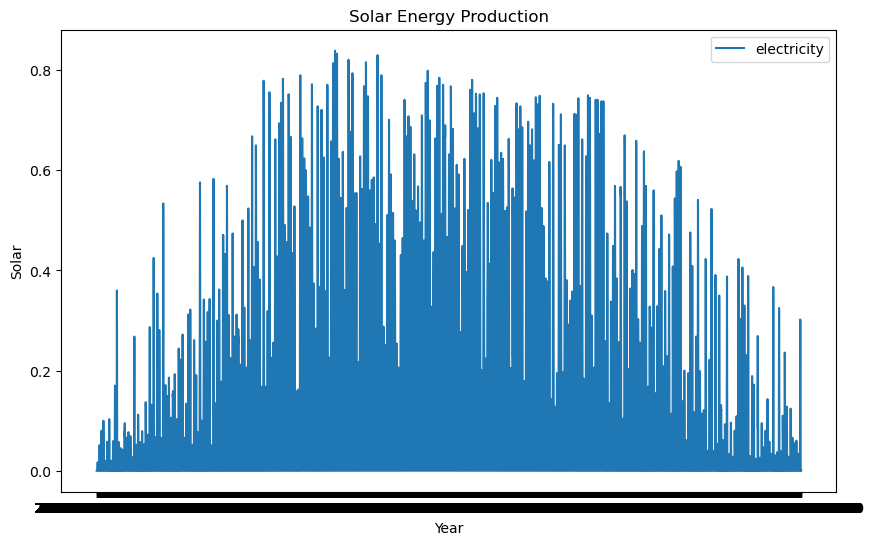

In [5]:
# plot the data
plt.figure(figsize=(10,6))
plt.plot(df['time'], df['electricity'], label='electricity')
plt.xlabel('Year')
plt.ylabel('Solar')
plt.title('Solar Energy Production')
plt.legend()
plt.show()

In [6]:
# convert the date and time to datetime
df['time'] = pd.to_datetime(df['time'])
df.dtypes


time                  datetime64[ns]
local_time                    object
electricity                  float64
irradiance_direct            float64
irradiance_diffuse           float64
temperature                  float64
dtype: object

In [7]:
# set index to time
df.set_index('time', inplace=True)
df.head()


,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature
time,,,,,
2019-01-01 00:00:00,2019-01-01 00:00,0.0,0.0,0.0,10.031
2019-01-01 01:00:00,2019-01-01 01:00,0.0,0.0,0.0,10.015
2019-01-01 02:00:00,2019-01-01 02:00,0.0,0.0,0.0,10.002
2019-01-01 03:00:00,2019-01-01 03:00,0.0,0.0,0.0,9.973
2019-01-01 04:00:00,2019-01-01 04:00,0.0,0.0,0.0,9.955


In [8]:
# groupby month 
df_month = df.resample('ME').sum()
df_month.head()


,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature
time,,,,,
2019-01-31,2019-01-01 00:002019-01-01 01:002019-01-01 02:...,13.238,5.918,11.260,6030.817
2019-02-28,2019-02-01 00:002019-02-01 01:002019-02-01 02:...,30.168,13.725,22.386,5961.817
2019-03-31,2019-03-01 00:002019-03-01 01:002019-03-01 02:...,65.832,35.703,41.150,6080.486
2019-04-30,2019-04-01 01:002019-04-01 02:002019-04-01 03:...,110.898,72.243,57.648,6765.188
2019-05-31,2019-05-01 01:002019-05-01 02:002019-05-01 03:...,145.880,101.469,70.639,7975.410


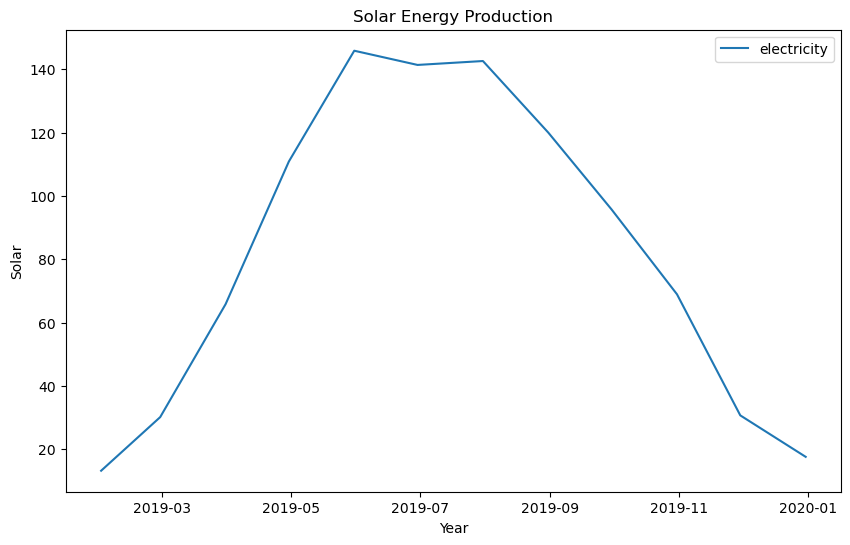

In [9]:
# plot the data
plt.figure(figsize=(10,6))
plt.plot(df_month['electricity'], label='electricity')
plt.xlabel('Year')
plt.ylabel('Solar')
plt.title('Solar Energy Production')
plt.legend()
plt.savefig('solarenergy.png')
plt.show()


***
### End